In [41]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving books.csv to books (1).csv


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Read the uploaded CSV file
df = pd.read_csv(list(uploaded.keys())[0])

# Number of Rows and Columns
num_rows, num_columns = df.shape
print(f"\nTotal Number of Rows: {num_rows}")
print(f"Total Number of Columns: {num_columns}\n")

# Total number of books
total_books = df.shape[0]
print(f" Total Books: {total_books}")

# Summary statistics for numeric attributes
numeric_stats = df.describe().T

# Display Dataset Information
print("\nDataset Information:")
print(df.info())  # Summary of dataset including column types and missing values

# Show First 5 Rows of Dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Summary Statistics for Numeric Columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())

# Count of Missing Values per Column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Missing data percentage
missing_data = df.isnull().sum() / num_rows * 100

print("\n### Missing Data Percentage ###")
print(missing_data[missing_data > 0])

# Unique Values Count for Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values Count for Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")





Total Number of Rows: 10000
Total Number of Columns: 23

 Total Books: 10000

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  ave

In [44]:
# Identify column types
column_types = {}
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Numeric columns
        column_types[col] = "Numeric"
    elif df[col].dtype == 'object':  # Categorical/discrete columns
        column_types[col] = "Discrete" if df[col].nunique() < df.shape[0] * 0.5 else "Possibly Unique"

column_types

{'book_id': 'Numeric',
 'goodreads_book_id': 'Numeric',
 'best_book_id': 'Numeric',
 'work_id': 'Numeric',
 'books_count': 'Numeric',
 'isbn': 'Possibly Unique',
 'isbn13': 'Numeric',
 'authors': 'Discrete',
 'original_publication_year': 'Numeric',
 'original_title': 'Possibly Unique',
 'title': 'Possibly Unique',
 'language_code': 'Discrete',
 'average_rating': 'Numeric',
 'ratings_count': 'Numeric',
 'work_ratings_count': 'Numeric',
 'work_text_reviews_count': 'Numeric',
 'ratings_1': 'Numeric',
 'ratings_2': 'Numeric',
 'ratings_3': 'Numeric',
 'ratings_4': 'Numeric',
 'ratings_5': 'Numeric',
 'image_url': 'Possibly Unique',
 'small_image_url': 'Possibly Unique'}

In [45]:
# Calculate missing data percentage
missingness = (df.isnull().mean() * 100).round(2)
missingness[missingness > 0]  # Show only columns with missing values

,0
isbn,7.00
isbn13,5.85
original_publication_year,0.21
original_title,5.85
language_code,10.84


In [46]:
# Get statistics for numeric attributes
numeric_stats = df.describe().T[['min', 'max', 'mean', '50%', 'std']]
numeric_stats.rename(columns={'50%': 'median'}, inplace=True)
numeric_stats

,min,max,mean,median,std
book_id,1.000000e+00,1.000000e+04,5.000500e+03,5.000500e+03,2.886896e+03
goodreads_book_id,1.000000e+00,3.328864e+07,5.264697e+06,3.949655e+05,7.575462e+06
best_book_id,1.000000e+00,3.553423e+07,5.471214e+06,4.251235e+05,7.827330e+06
work_id,8.700000e+01,5.639960e+07,8.646183e+06,2.719524e+06,1.175106e+07
books_count,1.000000e+00,3.455000e+03,7.571270e+01,4.000000e+01,1.704707e+02
isbn13,1.951703e+08,9.790008e+12,9.755044e+12,9.780452e+12,4.428619e+11
original_publication_year,-1.750000e+03,2.017000e+03,1.981988e+03,2.004000e+03,1.525767e+02
average_rating,2.470000e+00,4.820000e+00,4.002191e+00,4.020000e+00,2.544275e-01
ratings_count,2.716000e+03,4.780653e+06,5.400124e+04,2.115550e+04,1.573700e+05
work_ratings_count,5.510000e+03,4.942365e+06,5.968732e+04,2.383250e+04,1.678038e+05


In [47]:
# Analyze discrete columns
discrete_stats = {}
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].value_counts()
    discrete_stats[col] = {
        "unique_count": df[col].nunique(),
        "top_3_values": unique_values.head(3).to_dict()
    }

discrete_stats

{'isbn': {'unique_count': 9300,
  'top_3_values': {'439023483': 1, '310228638': 1, '1442413336': 1}},
 'authors': {'unique_count': 4664,
  'top_3_values': {'Stephen King': 60, 'Nora Roberts': 59, 'Dean Koontz': 47}},
 'original_title': {'unique_count': 9274,
  'top_3_values': {' ': 5, 'The Gift': 5, 'Perfect': 4}},
 'title': {'unique_count': 9964,
  'top_3_values': {'Selected Poems': 4,
   'Stone Soup': 3,
   'The Beach House': 2}},
 'language_code': {'unique_count': 25,
  'top_3_values': {'eng': 6341, 'en-US': 2070, 'en-GB': 257}},
 'image_url': {'unique_count': 6669,
  'top_3_values': {'https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png': 3332,
   'https://images.gr-assets.com/books/1447303603m/2767052.jpg': 1,
   'https://images.gr-assets.com/books/1328103463m/11981168.jpg': 1}},
 'small_image_url': {'unique_count': 6669,
  'top_3_values': {'https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png': 3332,
   'https:

In [48]:
# Check for strange values, e.g., original publication year anomalies
df[df['original_publication_year'] < 0]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,Ὀδύσσεια,...,670326,710757,8101,29703,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...
340,341,1371,1371,3293141,1726,140275363,9.780140e+12,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",-750.0,Ἰλιάς,...,241088,273565,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
402,403,10534,10534,3200649,1865,1590302257,9.781590e+12,"Sun Tzu, Thomas Cleary",-500.0,孫子兵法 [Sūnzi bīngfǎ],...,167332,203948,6335,2930,11589,48265,70644,70520,https://images.gr-assets.com/books/1453417993m...,https://images.gr-assets.com/books/1453417993s...
771,772,30289,30289,1625515,842,140449140,9.780140e+12,"Plato, Desmond Lee",-380.0,Πολιτεία,...,110274,122747,2261,2772,7531,29394,42284,40766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
823,824,1554,1554,3098166,498,1580495931,9.781580e+12,"Sophocles, J.E. Thomas",-430.0,Οἰδίπους Τύραννος,...,119496,134384,2129,3032,12324,42020,45436,31572,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1098,1099,57854,67896,100074,1265,679776192,9.780680e+12,"Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...",-300.0,道德經 [dào dé jīng],...,39863,80961,3165,903,2332,10967,22924,43835,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1119,1120,21348,21348,868263,942,192840509,9.780193e+12,"Aesop, Laura Harris, Laura Gibbs",-560.0,Aesopica,...,88508,98962,1441,773,3717,22587,34885,37000,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1279,1280,12914,12914,288738,830,679729526,9.780680e+12,"Virgil, Robert Fitzgerald",-17.0,Æneis,...,75051,85351,1804,1531,6436,23683,28909,24792,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1520,1521,7728,7728,1052210,423,1580493882,9.781580e+12,"Sophocles, J.E. Thomas",-441.0,Ἀντιγόνη,...,67608,78535,1893,1881,8279,25895,25697,16783,https://images.gr-assets.com/books/1486701308m...,https://images.gr-assets.com/books/1486701308s...
2051,2052,1540,1540,5672,331,015602764X,9.780156e+12,"Sophocles, Dudley Fitts, Elena Bono, Robert Fi...",-401.0,NaN,...,42175,50789,1122,701,2795,11945,17804,17544,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [50]:
# Data Cleaning - Handle Negative Publication Years
# Remove rows where the original publication year is negative or missing
df_clean = df[df["original_publication_year"] > 0]

# Confirm changes
print("\nDataset after removing invalid publication years:")
print(df_clean["original_publication_year"].describe())


Dataset after removing invalid publication years:
count    9948.000000
mean     1989.688983
std        63.459165
min         8.000000
25%      1990.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: original_publication_year, dtype: float64


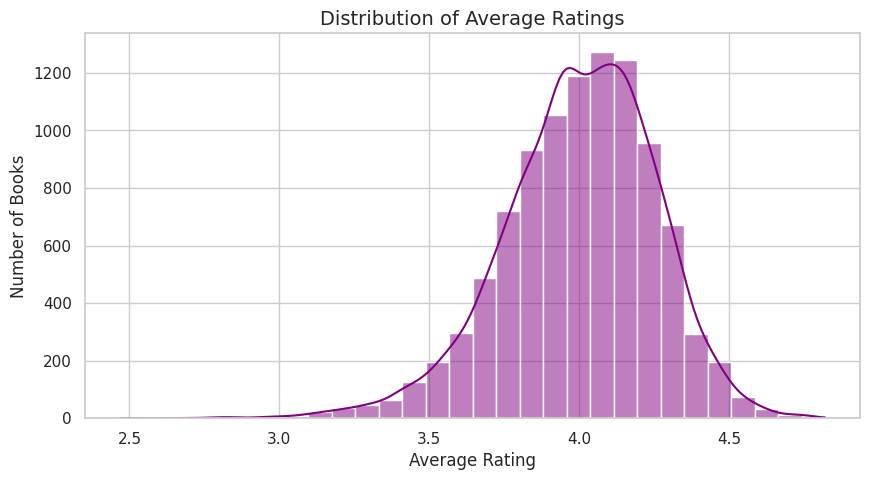

In [51]:
# Visualization - Distribution of Book Ratings
# ------------------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df_clean["average_rating"], bins=30, kde=True, color="purple")
plt.title("Distribution of Average Ratings", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-52-f93d4eced3aa>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




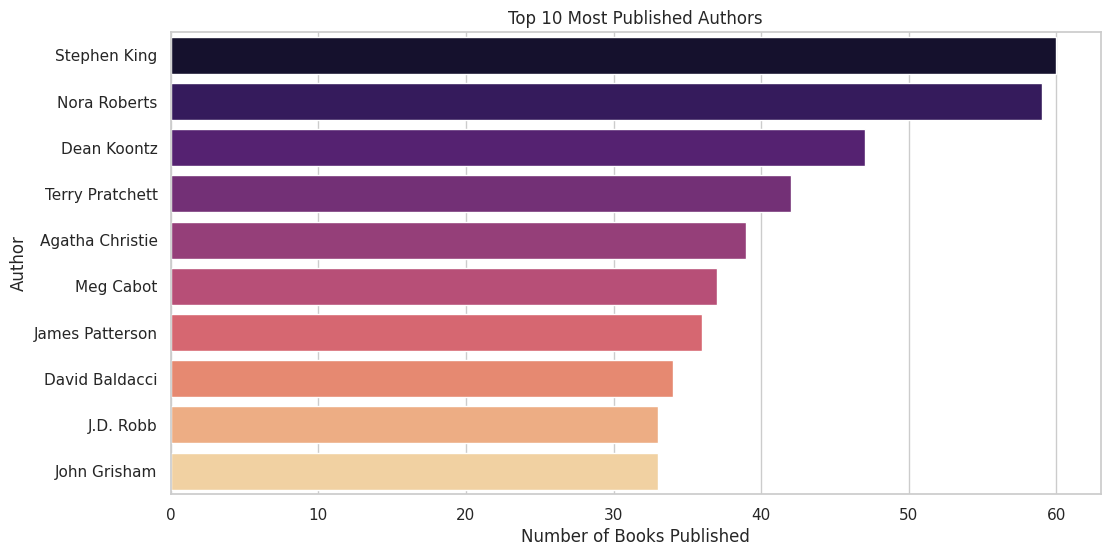

authors
Stephen King       60
Nora Roberts       59
Dean Koontz        47
Terry Pratchett    42
Agatha Christie    39
Meg Cabot          37
James Patterson    36
David Baldacci     34
J.D. Robb          33
John Grisham       33
Name: count, dtype: int64


In [52]:
# Count number of books per author
author_counts = df['authors'].value_counts().head(10)

# Plot the top 10 most published authors
plt.figure(figsize=(12,6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette="magma")
plt.xlabel("Number of Books Published")
plt.ylabel("Author")
plt.title("Top 10 Most Published Authors")
plt.show()

print(author_counts)


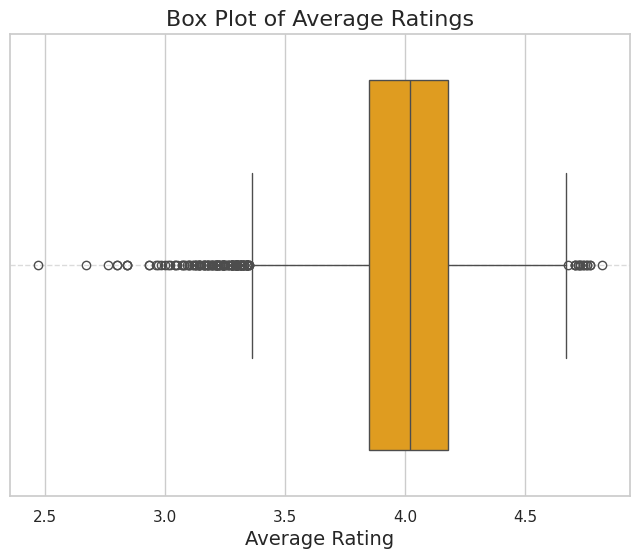

In [53]:
# Plot a box plot of average ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['average_rating'], color='orange')
plt.title('Box Plot of Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

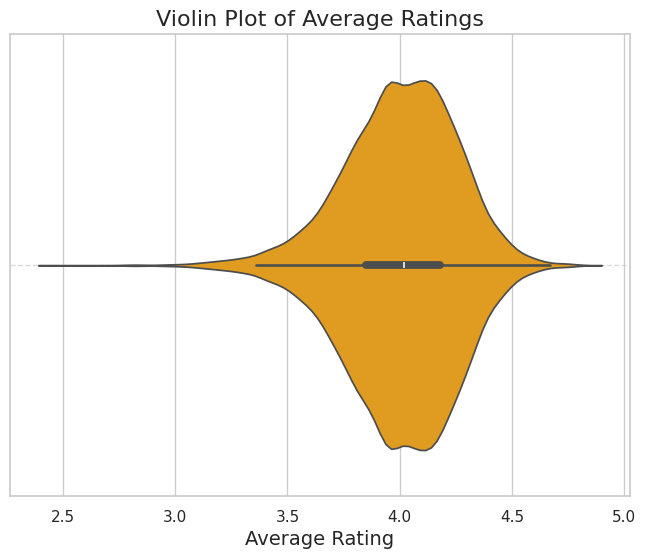

In [54]:

# Plot a violin plot of average ratings
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['average_rating'], color='orange')
plt.title('Violin Plot of Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

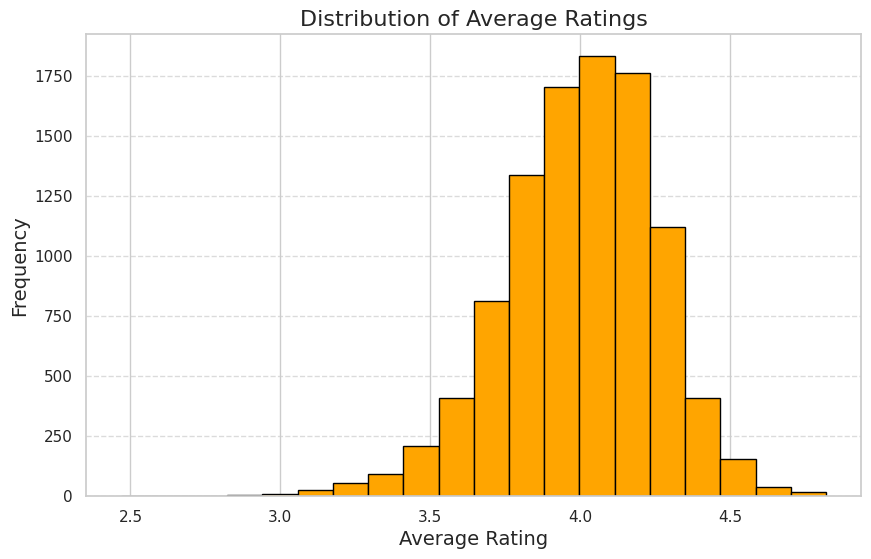

In [55]:
# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
plt.hist(df['average_rating'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
df.head()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


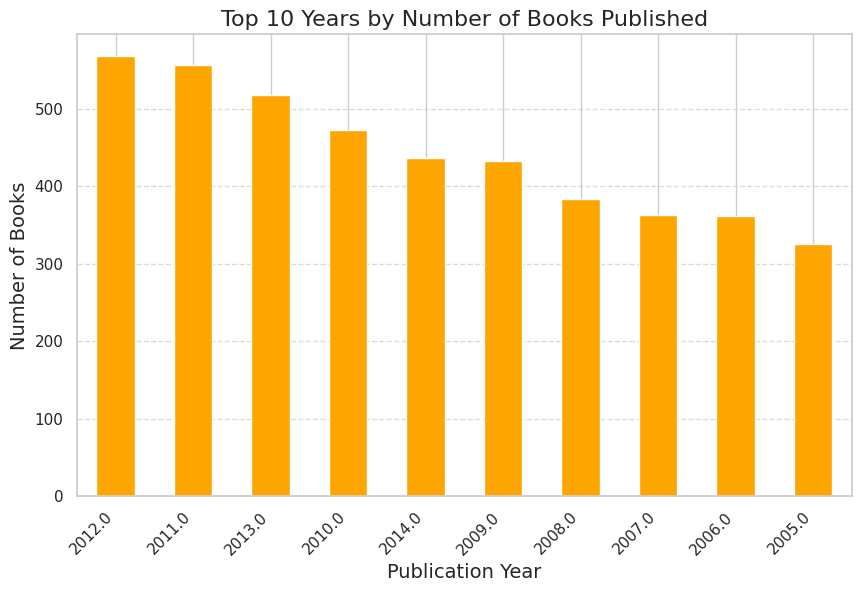

In [57]:
# Get the top 10 years by number of books published
top_years = df['original_publication_year'].value_counts().head(10)

# Plot the top 10 years
plt.figure(figsize=(10, 6))
top_years.plot(kind='bar', color='orange')
plt.title('Top 10 Years by Number of Books Published', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Number of Books', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

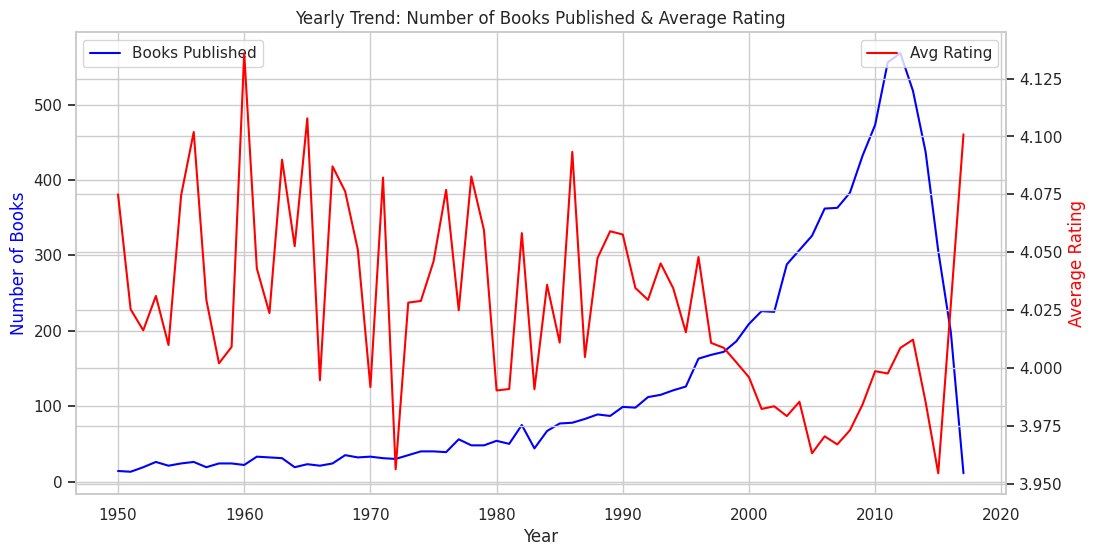

,original_publication_year,num_books,avg_rating
0,1950.0,14,4.075000
1,1951.0,13,4.025385
2,1952.0,19,4.016316
3,1953.0,26,4.031154
4,1954.0,21,4.010000


In [58]:
# Convert 'original_publication_year' to numeric for time-based analysis
df['original_publication_year'] = pd.to_numeric(df['original_publication_year'], errors='coerce')

# Filter for reasonable publication years (e.g., after 1800 to avoid incorrect data points)
df_filtered = df[(df['original_publication_year'] >= 1950) & (df['original_publication_year'] <= 2020)]

# Yearly Trend: Number of books published & average rating per year
yearly_data = df_filtered.groupby('original_publication_year').agg(
    num_books=('title', 'count'),
    avg_rating=('average_rating', 'mean')
).reset_index()

# Plot: Yearly trend (number of books published & average rating over time)
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot number of books published per year
sns.lineplot(x=yearly_data['original_publication_year'], y=yearly_data['num_books'], ax=ax1, color="blue", label="Books Published")
ax1.set_ylabel("Number of Books", color="blue")
ax1.set_xlabel("Year")
ax1.set_title("Yearly Trend: Number of Books Published & Average Rating")

# Create a second y-axis for average ratings
ax2 = ax1.twinx()
sns.lineplot(x=yearly_data['original_publication_year'], y=yearly_data['avg_rating'], ax=ax2, color="red", label="Avg Rating")
ax2.set_ylabel("Average Rating", color="red")

plt.show()

# Display the first few rows of the yearly data
yearly_data.head()


<Figure size 1400x700 with 0 Axes>

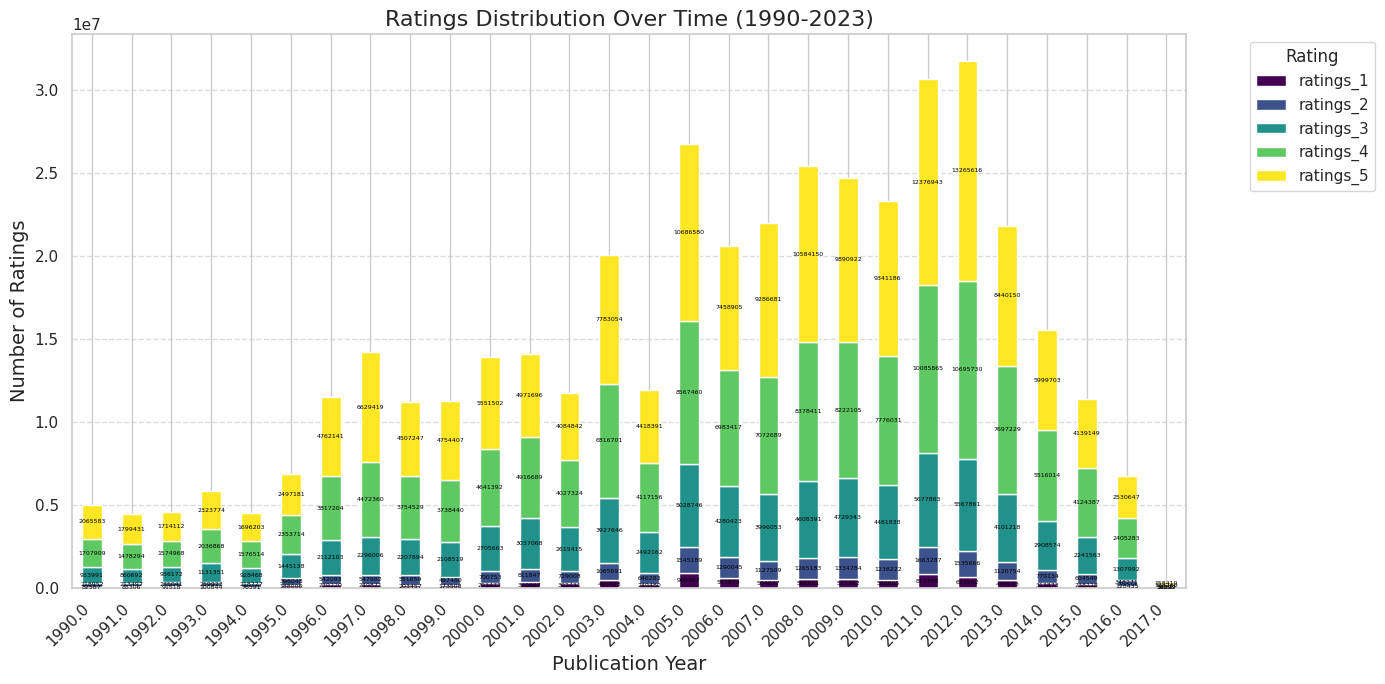

In [59]:
# Convert 'original_publication_year' to numeric and filter data from 1990 to 2023
df['original_publication_year'] = pd.to_numeric(df['original_publication_year'], errors='coerce')
df_filtered = df[(df['original_publication_year'] >= 1990) & (df['original_publication_year'] <= 2023)]

# Group by publication year and calculate the sum of ratings (1 to 5 stars)
yearly_ratings_distribution = df_filtered.groupby('original_publication_year')[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum()

# Convert the ratings to integers
yearly_ratings_distribution = yearly_ratings_distribution.astype(int)

# Plot the stacked bar chart
plt.figure(figsize=(14, 7))
ax = yearly_ratings_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))
plt.title('Ratings Distribution Over Time (1990-2023)', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels (number of ratings) on top of each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=4.5, color='black')

plt.tight_layout()
plt.show()

<ipython-input-60-041443071c34>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




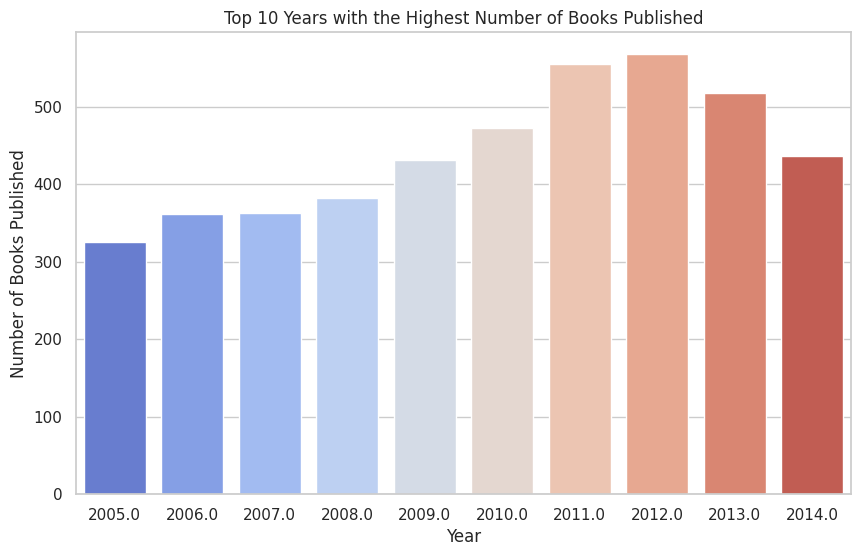

In [60]:
# Count the number of books published per year
books_per_year = df['original_publication_year'].value_counts()

# Select the top 10 years with the highest number of books published
top_10_years = books_per_year.nlargest(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='coolwarm')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.title('Top 10 Years with the Highest Number of Books Published')

# Display the plot
plt.show()


<ipython-input-61-972e7320a096>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-972e7320a096>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



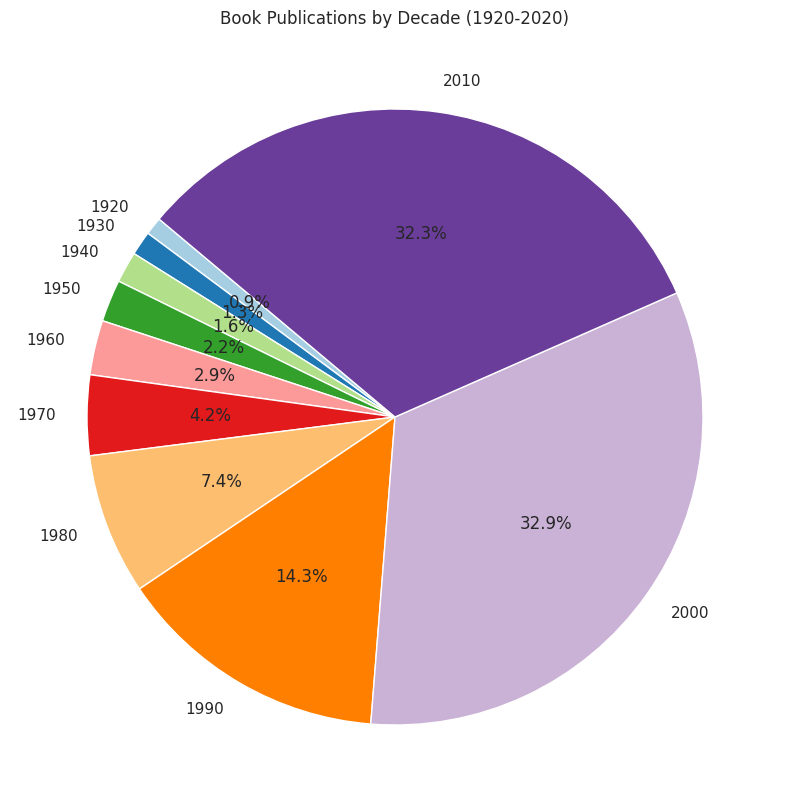

In [61]:

# Remove rows with missing publication years
df = df.dropna(subset=['original_publication_year'])

# Convert years to integers
df['original_publication_year'] = df['original_publication_year'].astype(int)

# Filter books published between 1920 and 2020
df_decade = df[(df['original_publication_year'] >= 1920) & (df['original_publication_year'] <= 2020)]

# Group by decade
df_decade['Decade'] = (df_decade['original_publication_year'] // 10) * 10
decade_counts = df_decade['Decade'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(decade_counts, labels=decade_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Book Publications by Decade (1920-2020)')
plt.show()


<ipython-input-62-a66edc749f62>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



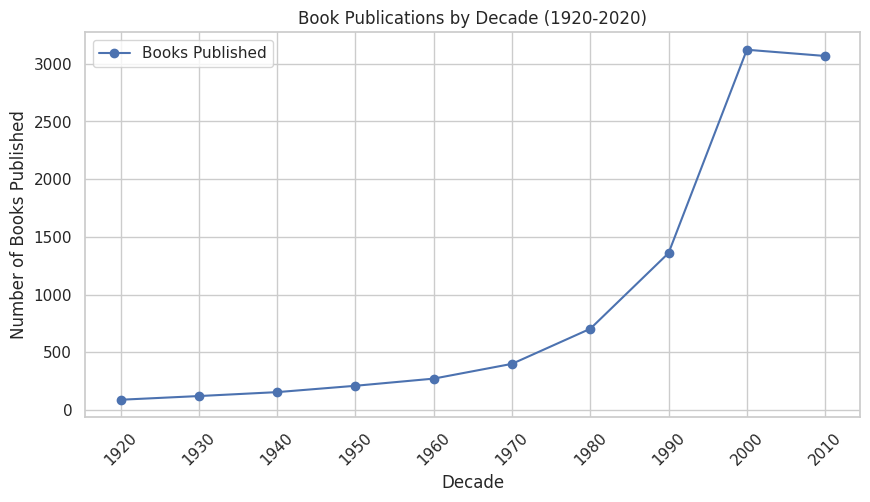

In [62]:
# Remove rows with missing publication years
df = df.dropna(subset=['original_publication_year'])

# Convert years to integers
df['original_publication_year'] = df['original_publication_year'].astype(int)

# Filter books published between 1920 and 2020
df_decade = df[(df['original_publication_year'] >= 1920) & (df['original_publication_year'] <= 2020)]

# Group by decade and count books
df_decade['Decade'] = (df_decade['original_publication_year'] // 10) * 10
decade_counts = df_decade['Decade'].value_counts().sort_index()

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(decade_counts.index, decade_counts.values, marker='o', linestyle='-', color='b', label='Books Published')

# Formatting the plot
plt.xlabel('Decade')
plt.ylabel('Number of Books Published')
plt.title('Book Publications by Decade (1920-2020)')
plt.xticks(decade_counts.index, rotation=45)  # Rotate x-axis labels for clarity
plt.grid(True)
plt.legend()
plt.show()

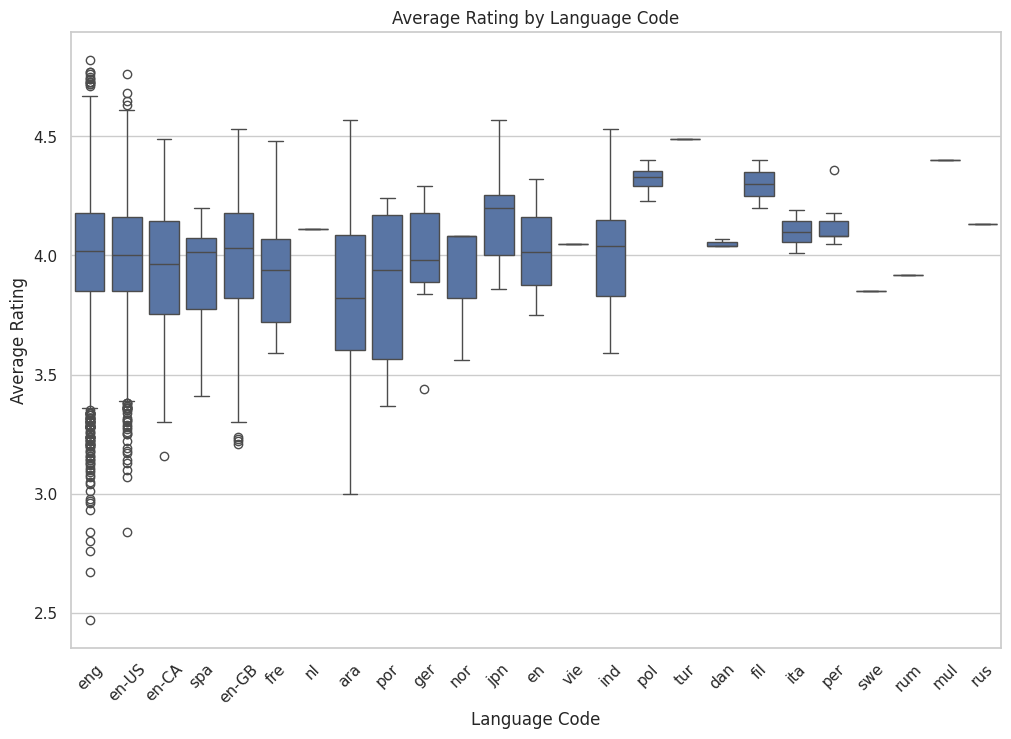

In [63]:
# Box Plot of Average Rating by Language Code
plt.figure(figsize=(12, 8))  # Adjusted size for better readability
sns.boxplot(x='language_code', y='average_rating', data=df)
plt.title('Average Rating by Language Code')
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()



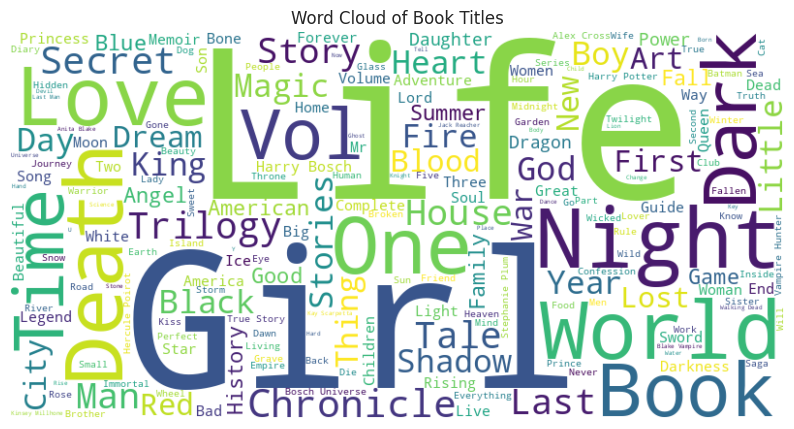

In [64]:
# World Cloud

from wordcloud import WordCloud

titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.show()

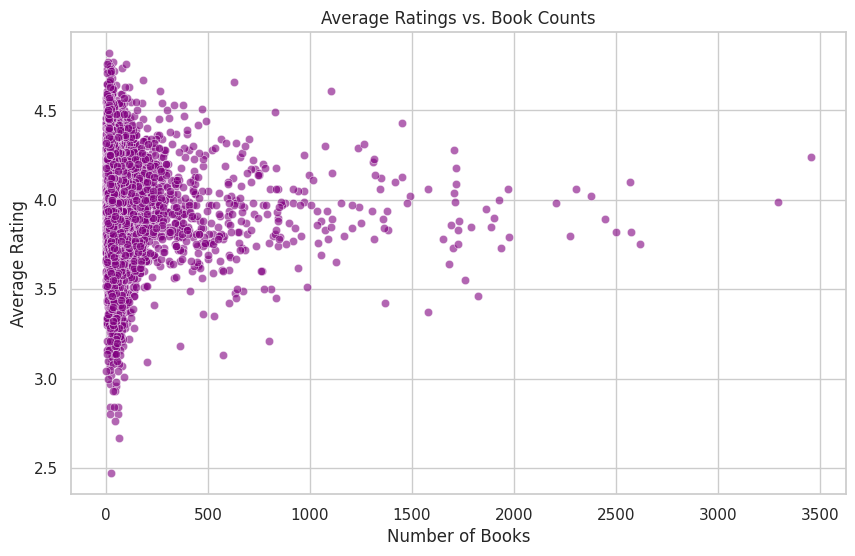

In [65]:
# Scatter plot of average ratings vs. book counts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='books_count', y='average_rating', data=df, alpha=0.6, color='purple')
plt.title('Average Ratings vs. Book Counts')
plt.xlabel('Number of Books')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-66-ef48d4bfe64b>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




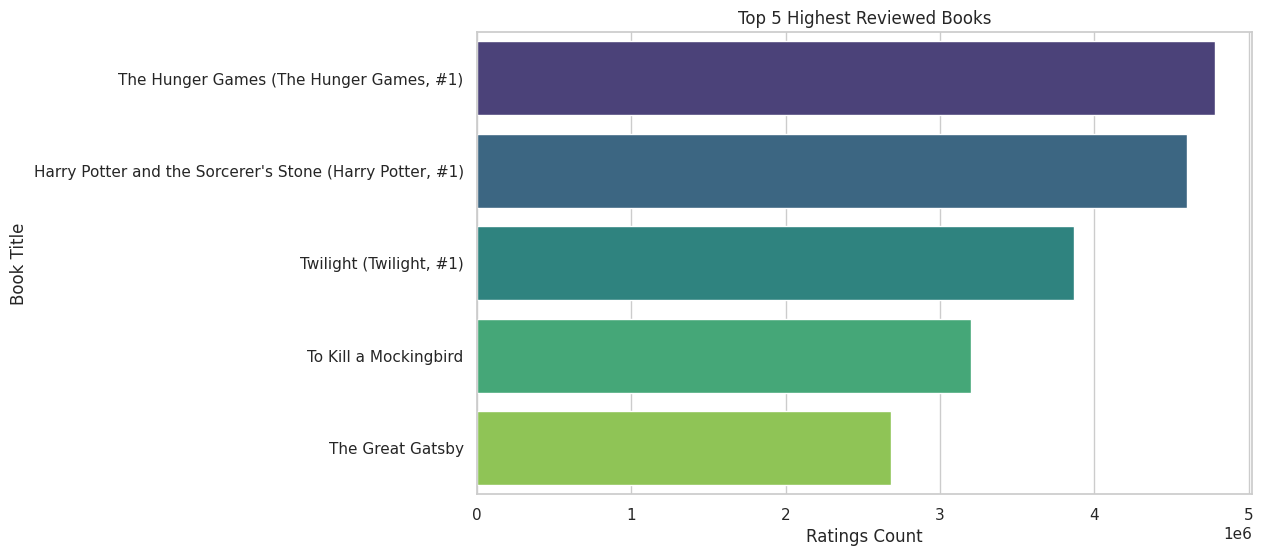

<ipython-input-66-ef48d4bfe64b>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




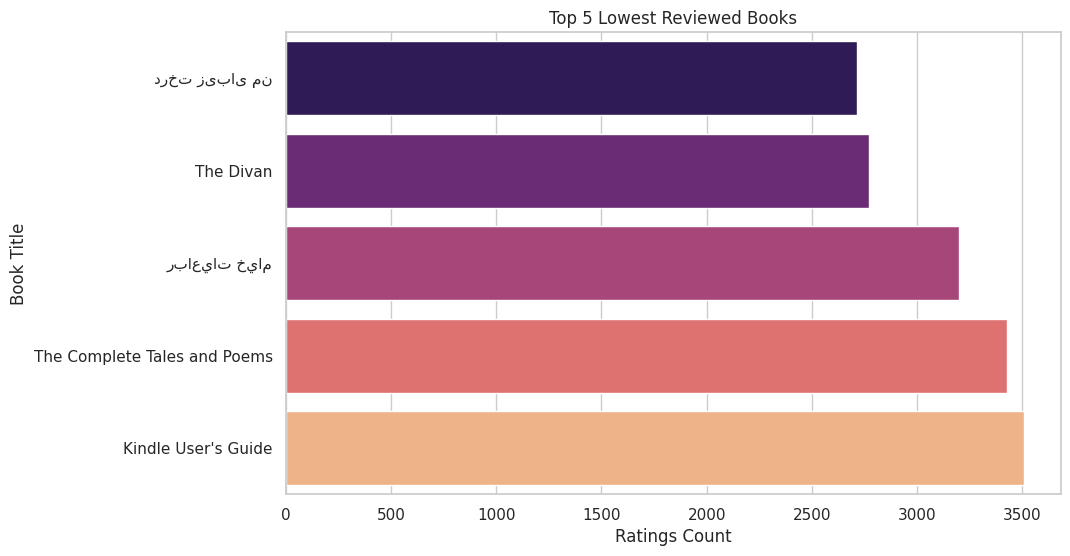

In [66]:
# Plot the top 5 lowest and highest reviewed books

import matplotlib.pyplot as plt
import seaborn as sns

# Sort by ratings_count in ascending order (lowest reviewed books)
lowest_reviewed_books = df.sort_values(by='ratings_count').head(5)

# Sort by ratings_count in descending order (highest reviewed books)
highest_reviewed_books = df.sort_values(by='ratings_count', ascending=False).head(5)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the top 5 highest reviewed books
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_count', y='title', data=highest_reviewed_books, palette='viridis')
plt.title('Top 5 Highest Reviewed Books')
plt.xlabel('Ratings Count')
plt.ylabel('Book Title')
plt.show()

# Plot the top 5 lowest reviewed books
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_count', y='title', data=lowest_reviewed_books, palette='magma')
plt.title('Top 5 Lowest Reviewed Books')
plt.xlabel('Ratings Count')
plt.ylabel('Book Title')
plt.show()

Mean Squared Error: 0.06089775787882723


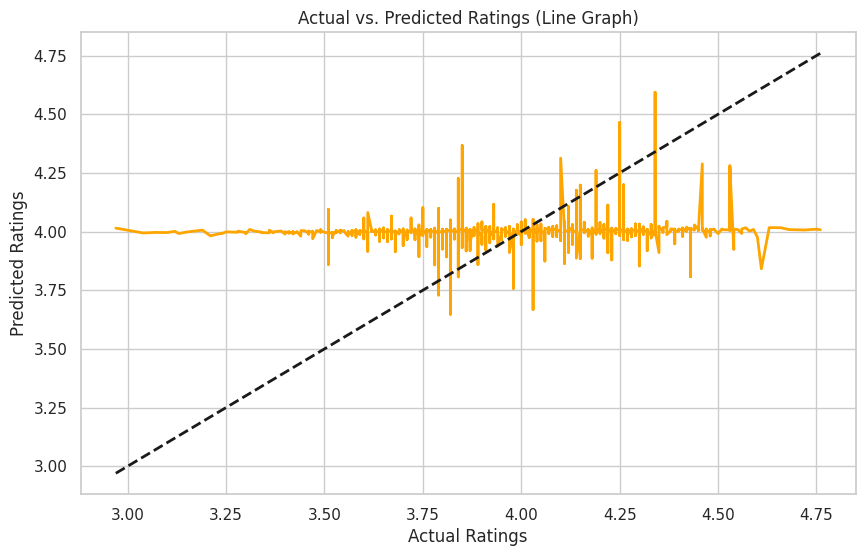

In [67]:
# Example ML Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = df[['books_count', 'ratings_count', 'work_text_reviews_count']]
y = df['average_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


import matplotlib.pyplot as plt
import numpy as np

# Plot: Line Graph of Actual vs. Predicted Ratings
plt.figure(figsize=(10, 6))

# Sort the actual and predicted values to ensure the line is connected in order
sorted_indices = np.argsort(y_test)
plt.plot(np.array(y_test)[sorted_indices], np.array(y_pred)[sorted_indices], color='orange', linewidth=2)

# Add a line representing perfect prediction (45-degree line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Titles and labels
plt.title('Actual vs. Predicted Ratings (Line Graph)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

plt.show()


In [68]:
# INTERACTIVE DISTRIBUTION OF THE TOP 5 BOOKS WITH RATINGS USING PLOTLY EXPRESS

# Install Plotly if not already installed
!pip install plotly

# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the data from the provided CSV content
import io
import requests

# Replace this URL with the actual URL of your CSV file if hosted online
# For now, we'll use the provided CSV content as a string
csv_content = """
book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
2,3,3,4640799,491,439554934,9.78043955493e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
3,41865,41865,3212258,226,316015849,9.78031601584e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
4,2657,2657,3275794,487,61120081,9.78006112008e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
5,4671,4671,245494,1356,743273567,9.78074327356e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg
6,11870085,11870085,16827462,226,525478817,9.78052547881e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m/11870085.jpg,https://images.gr-assets.com/books/1360206420s/11870085.jpg
7,5907,5907,1540236,969,618260307,9.7806182603e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,en-US,4.25,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m/5907.jpg,https://images.gr-assets.com/books/1372847500s/5907.jpg
8,5107,5107,3036731,360,316769177,9.78031676917e+12,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,eng,3.79,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m/5107.jpg,https://images.gr-assets.com/books/1398034300s/5107.jpg
9,960,960,3338963,311,1416524797,9.78141652479e+12,Dan Brown,2000.0,Angels & Demons ,"Angels & Demons  (Robert Langdon, #1)",en-CA,3.85,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m/960.jpg,https://images.gr-assets.com/books/1303390735s/960.jpg
10,1885,1885,3060926,3455,679783261,9.78067978327e+12,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,eng,4.24,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m/1885.jpg,https://images.gr-assets.com/books/1320399351s/1885.jpg
"""

# Load the CSV content into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_content))

# Sort the dataframe by average_rating in descending order and select the top 5 books
top_5_books = df.sort_values(by='average_rating', ascending=False).head(5)

# Create a bar chart using Plotly Express
fig = px.bar(top_5_books,
             x='title',
             y='average_rating',
             title='Top 5 Books by Average Rating',
             labels={'average_rating': 'Average Rating', 'title': 'Book Title'},
             text='average_rating')

# Update the layout for better visualization
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Book Title',
                  yaxis_title='Average Rating',
                  template='plotly_white')

# Show the plot
fig.show()

In [69]:
!pip install dash plotly flask pyngrok gunicorn


In [73]:
#INTERACTIVE DASHBOARD

import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
from flask import Flask
import os
from pyngrok import ngrok

# Read the uploaded CSV file
df = pd.read_csv(list(uploaded.keys())[0])

# Flask Server
server = Flask(__name__)
app = Dash(__name__, server=server)

# Layout of Dashboard
app.layout = html.Div([
    html.H1("Books Dashboard"),
    dcc.Dropdown(
        id='author-filter',
        options=[{'label': authors, 'value': authors} for authors in df['authors'].unique()],
        multi=True,
        placeholder="Filter by Author"
    ),
    dcc.Graph(id='rating-distribution')
])

# Callbacks for Interactivity
@app.callback(
    Output('rating-distribution', 'figure'),
    Input('author-filter', 'value')
)
def update_chart(selected_authors):
    filtered_df = df if not selected_authors else df[df['authors'].isin(selected_authors)]
    fig = px.histogram(filtered_df, x='average_rating', nbins=20, title='Book Ratings Distribution')
    return fig

# Running App with Ngrok
if __name__ == '__main__':
    port = 8050
    os.system(f"gunicorn -w 4 -k uvicorn.workers.UvicornWorker app:server --bind 0.0.0.0:{port} &")
    print("Run the next cell to expose the app using Colab's public URL:")
    app.run_server(debug=False, host='0.0.0.0', port=port)


Run the next cell to expose the app using Colab's public URL:


<IPython.core.display.Javascript object>